# Applying and Evaluating K-means Clustering

This tutorail explains application and evaluation of K-means clustering algorithm in python. K-means clustering algorithm groups similar data points present in the data set into K categories. Where K is defined by the user. The mapping of data points in K-means clustering changes with making changes in value of K. Hence, it is important that clustering output be evaluated on its quality. There are two main properties to evaluate quality of clustering. One is inter-cluster tightness of data points and intra-cluster distance that measures distance between clusters. The clustering algorithm aims to find clusters from  a given data set such that distance between data points belonging to same cluster is minimum and distance between different clusters are maximum. The measures SSE(Sum of squared error) evaluates within cluster distance between data points whereas,  Silhouette score is used to find distances between clusters. We aim for clustering output where, SSE is low and Silhouette score is high. In addition to these evaluating measures, it is also good to analyse how data points are mapped in different clusters. We do not want to keep high number of clusters with uneven data distribution between clusters. Hence, in order to evaluate  clustering output it is important to analyse SSE, Silhouette score and distribution of data points per cluster to make fair judgement on number and quality and clustering. The key learning from this tutorial are:

1. Applying K-means on given data set

2. Visualizing clustering output

3. Interpreting clustering output

4. Evaluate clustering output using SSE and Silhouette score

5. Analysing evaluating measures to decide final clustering output

The data set used for demonstration is called Moneyball taken form https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/data . The data has been gathered from baseball-reference.com of differnt players. It contains following features:
RA: runs allowed
RS: runs scored
OBP: On Base Percentage
SLG: Slugging Percentage
BA: Batting Average
OOBP: opponent’s OBP
OSLG: opponent’s SLG
W: wins in that season

Cluserting on this data set can provide insight on how different players match in their playing skills and charteristics. 

The step by step practical learning on implementing and analysing K-means cluserting  to group players using Baseball data is demonstrated below.

# 1. Importing Libraries

In [ ]:
# pandas for data manipulation

import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
% matplotlib inline
# importing KMeans function from scikit learn
from sklearn.cluster import KMeans

# importing StandardScaler from  scikit learn for data pre-processing
from sklearn.preprocessing import StandardScaler

# importing  silhouette_score metrices available in sklearn
from sklearn.metrics.cluster import silhouette_score

  

# 2. Loading Data set

In [ ]:
dataset = pd.read_csv('Data sets/moneyball.csv')
dataset.describe()

,RS,RA,OBP,SLG,BA,Playoffs,RD,W
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,703.809313,703.809313,0.324961,0.390412,0.258153,0.170732,0.000000,80.881375
std,93.314579,93.784100,0.015391,0.033110,0.013266,0.376483,101.188684,11.403424
min,463.000000,472.000000,0.277000,0.301000,0.214000,0.000000,-331.000000,40.000000
25%,641.250000,640.000000,0.314000,0.368000,0.250000,0.000000,-70.750000,73.000000
50%,695.000000,697.000000,0.324000,0.388000,0.258000,0.000000,3.000000,81.000000
75%,761.750000,763.000000,0.335000,0.411750,0.267000,0.000000,69.750000,89.000000
max,1009.000000,1103.000000,0.373000,0.485000,0.294000,1.000000,309.000000,116.000000


Since features are in different scales, it is important to apply pre-processing on the data to make them fall in same range. Cluserting is sensitive to magnitude of feature values hence if the data set is not standardize then it is required to pre-process it. 

# 3. Data Pre-processing

In [ ]:
# Standardize data set using StandardScaler() function avaialable in sklearn
scaler = StandardScaler()
scaler.fit(dataset)

dataset_scaled = scaler.transform(dataset)

dataset_scaled=pd.DataFrame(dataset_scaled)

# 4. Setting value of K for K-means Clustering

In [ ]:
#set value of k
K = 3

# 5. Applying K-means Clustering 

In [ ]:
# KMeans() function in sklearn is used to apply K-means clustering. This function takes as
#parametersm n_clusters(value K set by user)  the method to choose intitial centroid which 
# is k-means++ in below setting. 

kmeans = KMeans(n_clusters=K,init='k-means++')

# Fitting kmeans on the dataset

labels=kmeans.fit_predict(dataset_scaled)
# labels will carry cluster mapping information for each instance present in the data set

# 6. Printing Centroid of each cluster

In [ ]:
print("Information on cluster centers")
print("------------------------------")

for i in range(0,K):
    print("The cluster center for: C", i)
    print(kmeans.cluster_centers_[i,:])

Information on cluster centers
------------------------------
The cluster center for: C 0
[ 0.87960912 -0.49932541  0.8172311   0.72830762  0.66189096  2.13486317
  1.27394817  1.31285852]
The cluster center for: C 1
[ 0.51109053  0.49565095  0.49903904  0.53362983  0.56275353 -0.45374261
  0.01193828  0.01455365]
The cluster center for: C 2
[-0.89968745 -0.30503242 -0.86100126 -0.85959765 -0.86196267 -0.42477655
 -0.54696595 -0.56600859]


# 7. Printing Mapping of Data points per Cluster

In [ ]:
# making dataframe that details mapping of cluster with each data point present in the 
# data set
print("Cluster mapping of data points(top 10)\n")
print("--------------------------------")
Cluster_info_mapping=pd.DataFrame(dataset_scaled.index.values, columns=['Datapoint'])
Cluster_info_mapping['Cluster'] = labels

# printing top 10 assignments of data points present in the data set
print(Cluster_info_mapping.head(10))

print("Number of data points per cluster\n")
print("----------------------------------")

# printing total number of data points per cluster

print(Cluster_info_mapping['Cluster'].value_counts())



Cluster mapping of data points(top 10)

--------------------------------
   Datapoint  Cluster
0          0        1
1          1        0
2          2        0
3          3        2
4          4        1
5          5        1
6          6        1
7          7        1
8          8        0
9          9        1
Number of data points per cluster

----------------------------------
1    381
2    367
0    154
Name: Cluster, dtype: int64


The first output details mapping of data points to different clusters. For eg., data points 1,2,8 are mapped to cluster 1 whereas, 0,4,5,6,7,9 are grouped together in cluster 0. The complete detail of mapping can be printed by removing the head() function with Cluster_info_mapping. The second output details on total number of data points per cluster. As per the output, cluster 0 carries 381 instances, cluster 2 367 data points and cluster 1 with 154 instances. 

# 8. Printing SSE of the Clustering Output

In [ ]:
# the insertia_ function prints SSE of the clustering output 

print("SSE score:", kmeans.inertia_)

SSE score: 3552.7470668676997


The SSE score for K = 3 is 3552.74 indicating distances within clusters is high. It requires to experiment on different values of K so as to find setting where SSE is low.

# 9. Visualization of Clusters



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b3ecc18>,
      dtype=object)

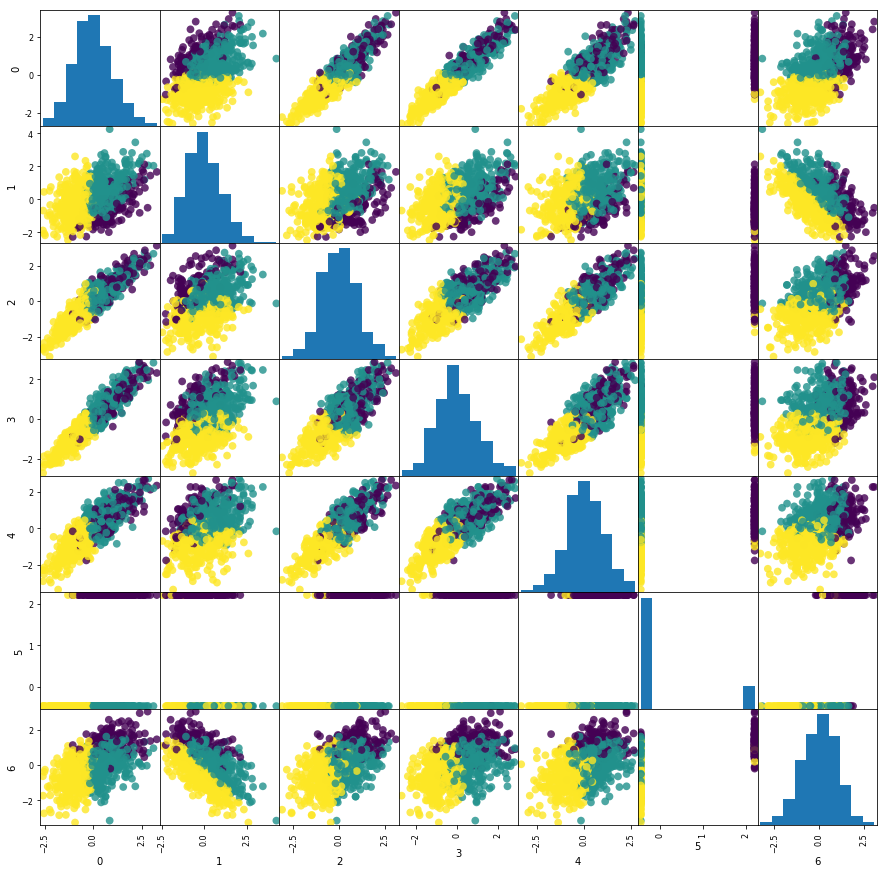

In [ ]:
pd.plotting.scatter_matrix(dataset_scaled.iloc[:,0:7], c=labels, figsize=(15, 15), marker='o',
                         s=60, alpha=.8)

Clustering by theory discoveres common patterns between data points present in the data set. Data points sharing common properties are grouped together by applying clustering. Visualizing grouping of data points based on clusters can help understand mapping of data points to different clusters based on their similarity. The visualization above is the pair wise plot between different features present in the data set grouped by clusters. For example, in the pair wise plot between features  RS(feature 0) and RA(1)  discerens between three clusters. It means that these two features are good estimators to group similarity between data points. Same can be observed between RS(feature 0) and W(feature 7). However, features OBP(feature 2) and Ra(Feature 1) fails to provide clear distinction among common patterns between data points( green class is somewhere mixed with other classes) 

# 10.  How to choose value of K ?

The value of K can be set by domain knowledge or by experimenting on the data set given. In absence of domain knowledge, the best way to find the value k for the given data set is SSE(Sum of squared error). It measures, within cluster distance between data points. For a better cluster, the SSE should be low. The simple idea of to iterate on different possible values of K to compute SSE. The  K value at which we find minimum SSE can be considered as best K value for the given problem. One of the way to visually inspect K value based on SSE is by studying Elbow chart. The x-axis of the chart represents no. of clusters(value K) and Y-axis indicates SSE. The value on the chat where this decrease in SSE value becomes constant can be chosen as the right cluster value for given data set.

In sklearn, SSE can retreived by using insertia_ function with the object of kmeans function. The code below demonstrates how to plot and interpret Elbow chart to find value K for the given data set

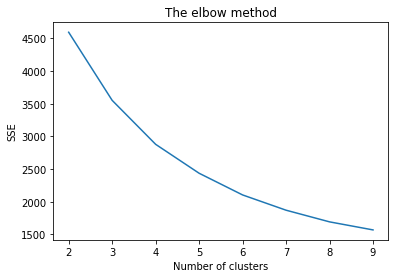

In [ ]:
SSE =[]
# applying  K-means on different values of K on the dataset
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(dataset_scaled)
    kmeans.fit(dataset_scaled)
    SSE.append(kmeans.inertia_)
    
# plotting elbow graph
plt.plot(range(2, 10), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

SSE dramatically decreases after K= 4. Hence, choosing K around this value can be a better choice for the given data set

# 11. Reclustering on same Data set using Different Value of K

In [ ]:
# repeating clustering with K  = 6
k_elbow = 6
kmeans = KMeans(n_clusters=k_elbow,init='k-means++')
labels=kmeans.fit_predict(dataset_scaled)

print("Cluster mapping of data points(top 10)\n")
print("--------------------------------")
Cluster_info_mapping=pd.DataFrame(dataset_scaled.index.values, columns=['Datapoint'])
Cluster_info_mapping['Cluster'] = kmeans.labels_
print(Cluster_info_mapping.head(10))
#Cluster_info[['Cluster']] = Cluster_info['Cluster'].replace([0, 1, 2,3], ['C0', 'C1', 'C2','C3']
print("Number of data points per cluster\n")
print("----------------------------------")
print(Cluster_info_mapping['Cluster'].value_counts())
print("SSE score:", kmeans.inertia_)

Cluster mapping of data points(top 10)

--------------------------------
   Datapoint  Cluster
0          0        3
1          1        4
2          2        1
3          3        3
4          4        5
5          5        5
6          6        5
7          7        3
8          8        4
9          9        5
Number of data points per cluster

----------------------------------
2    236
3    179
5    171
0    162
1     91
4     63
Name: Cluster, dtype: int64
SSE score: 2104.3027722389747


By interpreting Elbow graph it is identified that after K = 4, SSE score will be low(indicating within cluster distances between data points will be minimum). The experiment above is by setting K = 6.  It is observed that SSE from K = 3 which was 3552.7 has dropped to 2104.24 when K is set to K =6. The experiment can be repeated for even high values of K to find SSE. 

Besides interpreting SSE it is also important to analyse mapping of data points to different clusters. We do not aim large number clusters carrying low number of data points per cluster. For  K = 6, clusters 1,3,5,2 carries maximum samples and the mapping goes down in 0,4 clusters. 

# 12. Evaluating Clustering Output Using Silhouette_score

Silhouette score can be used to determine the degree of separation between clusters. The value of score ranges in interval [-1, 1]. The value close to 1 indicates good separation between clusters. On the other hand, a value close to 0 indicates that clusters are close to each other. The negative score represents wrong assignment of data points to the cluster. 

In [ ]:
# Reapplying K-means on the same data set with different values of K
for i in range(2, 20):
    kmeans1 = KMeans(n_clusters=i).fit(dataset_scaled)
    kmeans1.fit(dataset_scaled)
    print(kmeans1.labels_.shape)
    # compute silhouette_score of each clustering output
    score = silhouette_score(dataset_scaled, kmeans1.labels_, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))

(902,)
For n_clusters = 2, silhouette score is 0.32408591148773297)
(902,)
For n_clusters = 3, silhouette score is 0.299664193371154)
(902,)
For n_clusters = 4, silhouette score is 0.2825510464044369)
(902,)
For n_clusters = 5, silhouette score is 0.28242151870284804)
(902,)
For n_clusters = 6, silhouette score is 0.2921941622925998)
(902,)
For n_clusters = 7, silhouette score is 0.2794318559032881)
(902,)
For n_clusters = 8, silhouette score is 0.2855310793660385)
(902,)
For n_clusters = 9, silhouette score is 0.26316938599428424)
(902,)
For n_clusters = 10, silhouette score is 0.2596192634083365)
(902,)
For n_clusters = 11, silhouette score is 0.2470990835153858)
(902,)
For n_clusters = 12, silhouette score is 0.2403198417614055)
(902,)
For n_clusters = 13, silhouette score is 0.230600311565656)
(902,)
For n_clusters = 14, silhouette score is 0.22777123052766932)
(902,)
For n_clusters = 15, silhouette score is 0.22404614900219685)
(902,)
For n_clusters = 16, silhouette score is 0.218




In the results we achieved on the data set, the Silhouette score for different value of K is not very promising. The maximum value of score is resulted when K was set to 3. Hence, if we use K =3 for this data set, we will get a better inter-cluster and intra-cluster distance. 